In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import numpy as np

In [106]:
df = pd.read_csv('memesim_1000_100_10_0.5_2022-05-19_13:21:41.328100.csv', sep=';')
df.head()

,epoch,id,imeme


Count occurrences of memes across all epochs and minds. This is how much each individual meme survived.

In [107]:
survival = df['imeme'].value_counts()
survival.index = [i for i in range(1, len(survival)+1)]
survival.head()

Series([], Name: imeme, dtype: int64)

<AxesSubplot:>

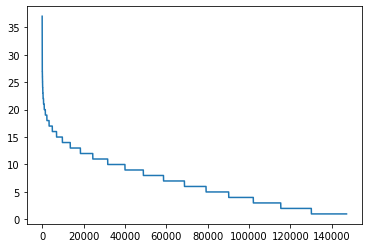

In [99]:
survival.plot()

In [76]:
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

In [100]:
# Fit the data
x_data = survival.index.astype(np.int64).to_numpy()
y_data = survival.astype(np.int64).to_numpy()
pars, cov = curve_fit(f=power_law, xdata=x_data, ydata=y_data, p0=[0, 0], bounds=(-np.inf, np.inf))

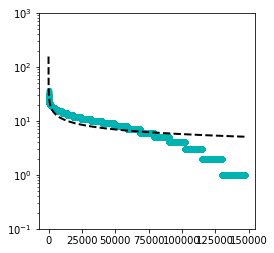

In [105]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])
# Set the y-axis scaling to logarithmic
ax.set_yscale('log')
# Set the y-ticks
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))# Set the y-axis limits
ax.set_ylim(0.1, 1000)
# Plot the data
ax.scatter(x_data, y_data, s=20, color='#00b3b3', label='Data')
# Plot the fit data as an overlay on the scatter data
ax.plot(x_data, power_law(x_data, *pars), linestyle='--', linewidth=2, color='black')

In [104]:
print(pars)

[154.86424284  -0.28730582]
